# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from datetime import datetime, timedelta

# Loading Dataset

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

From the data we see that there are 110,527 observations and 14 column features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in any of the columns

In [7]:
df['PatientId'].nunique()

62299

62,299 unique patients

In [8]:
df['AppointmentID'].nunique()

110527

A total of 110,527 unique appointments

# Data Cleaning

In [9]:
# Rename columns names to correct spellings - 'Hipertension', 'Diabetes', 'Alcoholism','Handcap' 

df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [74]:
result = data.groupby('AppointmentID').size().reset_index(name='n').sort_values(by='n', ascending=False).head()

print(result)

       AppointmentID  n
0            5030230  1
73693        5709283  1
73691        5709281  1
73690        5709278  1
73689        5709275  1


In [76]:
result = data.groupby('PatientId').size().reset_index(name='n').sort_values(by='n', ascending=False).head()

print(result)

          PatientId   n
59336  8.221459e+14  88
2840   9.963767e+10  84
30055  2.688613e+13  70
31569  3.353478e+13  65
60232  8.713749e+14  62


The AppointmentID is unique everytime but the patientId is common to a single patient which has made multiple visits. 

PatientID could be more fruitful in finding recurring trend with a given patient but appointmentID might not be too useful in our analysis so we can drop this column.

In [19]:
# removing unwanted columns not needed for our analysis. 
# PatientId and Appointment Id would not be necessary for our analysis and thus would be removed

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

KeyError: "['PatientId' 'AppointmentID'] not found in axis"

In [10]:
# renaming 'No-show' and its column values to Appointment _status

df = df.rename(columns={'No-show':'Appointment_status'})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# function to show unique categories for categorical columns
def get_unique_values(dataframe, columns):
    unique_values = {}
    
    for column in columns:
        unique_values[column] = dataframe[column].unique().tolist()
    
    return unique_values

In [12]:
columns_to_check = ['Gender', 'Scholarship', 'Hypertension', 'Alcoholism', 'Handicap', 'SMS_received', 'Appointment_status']
unique_values = get_unique_values(df, columns_to_check)

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")

Unique values in Gender: ['F', 'M']
Unique values in Scholarship: [0, 1]
Unique values in Hypertension: [1, 0]
Unique values in Alcoholism: [0, 1]
Unique values in Handicap: [0, 1, 2, 3, 4]
Unique values in SMS_received: [0, 1]
Unique values in Appointment_status: ['No', 'Yes']


In [13]:
# Convert the dtypes of the date columns to datetime datatypes

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   PatientId           110527 non-null  float64            
 1   AppointmentID       110527 non-null  int64              
 2   Gender              110527 non-null  object             
 3   ScheduledDay        110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay      110527 non-null  datetime64[ns, UTC]
 5   Age                 110527 non-null  int64              
 6   Neighbourhood       110527 non-null  object             
 7   Scholarship         110527 non-null  int64              
 8   Hypertension        110527 non-null  int64              
 9   Diabetes            110527 non-null  int64              
 10  Alcoholism          110527 non-null  int64              
 11  Handicap            110527 non-null  int64              
 12  SMS_received    

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_status
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Lets create an age group range by group patients into different categories of age-group.

3539 patients are 0 years old, and we see that Age column has a negative minimum value of -1 which is odd.

In [17]:
# Change the -1 entry to the mean Age
df['Age'].replace({-1: 37}, inplace=True)

# Exploratory Data Analysis

In [47]:
df['Appointment_status'].value_counts()

No     88208
Yes    22319
Name: Appointment_status, dtype: int64

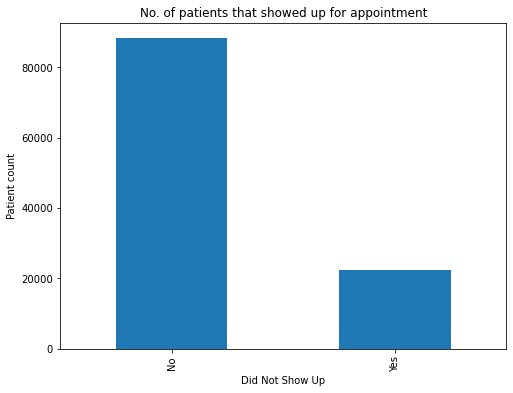

In [51]:
# lets see the visual distribution of those that came for their appointment.
df['Appointment_status'].value_counts().plot(kind='bar', figsize=(8,6), xlabel='Did Not Show Up', 
                        ylabel='Patient count', title='No. of patients that showed up for appointment');

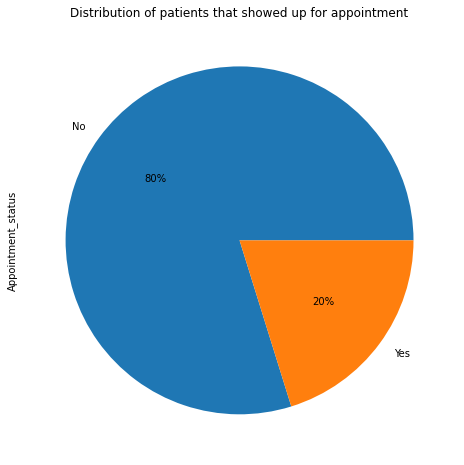

In [53]:
# let also create a pie chart to show the distribution of patients that showed up for their appointments
index = df['Appointment_status'].value_counts().index
df['Appointment_status'].value_counts()[index].plot(kind='pie', figsize=(10,8), autopct='%1.0f%%',
                                                  title='Distribution of patients that showed up for appointment');

In [21]:
df['Appointment_status'].value_counts()

No     88208
Yes    22319
Name: Appointment_status, dtype: int64

Out of 110527 patients that scheduled appointments, 88208 showed up corresponding to 80% while 22319 did not show up corresponding to 20% of total patients.





**1. What gender books more medical appointments**

In [23]:
df.groupby('Gender')['AppointmentID'].nunique()

Gender
F    71840
M    38687
Name: AppointmentID, dtype: int64

from the data we see that female patients scheduled more medical appointments compared to the male patients

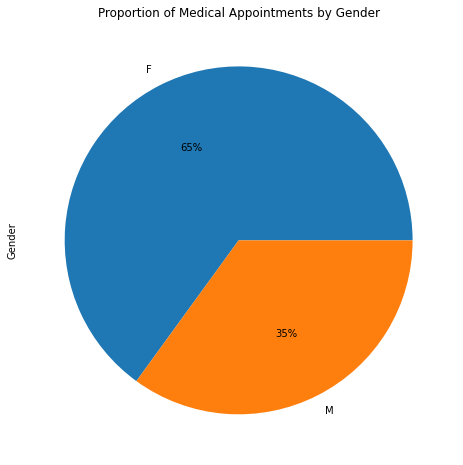

In [33]:
df['Gender'].value_counts().plot(kind='pie', title='Proportion of Medical Appointments by Gender',
                                 figsize=(10, 8), autopct='%1.0f%%');

**2. Does awaiting time-interval have any effect on patients showing up for appointments.**

To compute this we calculate the time difference between the time appointment was scheduled and the appointment date. 

To investigate if the wait duration had an effect on the patients showing up for appointment, we will need to know the number of days between when the appointment was scheduled and the appointment day. 

In [34]:
df['time_before_appointment'] = abs(df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_status,time_before_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [36]:
#summary statistics of this new time duration variable
df['time_before_appointment'].describe()

count                        110527
mean     10 days 04:24:47.462791897
std      15 days 06:07:01.236696805
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: time_before_appointment, dtype: object

In [38]:
# Create a new column for day of the week to find what day of the week the appointment was made
df['appointment_day_of_week'] = df.AppointmentDay.dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_status,time_before_appointment,appointment_day_of_week
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,Friday


In [39]:
# Change time_before_appointment to from datetime to integer
df['time_before_appointment'] = df['time_before_appointment'].dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   PatientId                110527 non-null  float64            
 1   AppointmentID            110527 non-null  int64              
 2   Gender                   110527 non-null  object             
 3   ScheduledDay             110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay           110527 non-null  datetime64[ns, UTC]
 5   Age                      110527 non-null  int64              
 6   Neighbourhood            110527 non-null  object             
 7   Scholarship              110527 non-null  int64              
 8   Hypertension             110527 non-null  int64              
 9   Diabetes                 110527 non-null  int64              
 10  Alcoholism               110527 non-null  int64              
 11  Handicap     

In [40]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,time_before_appointment
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183883
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254875
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


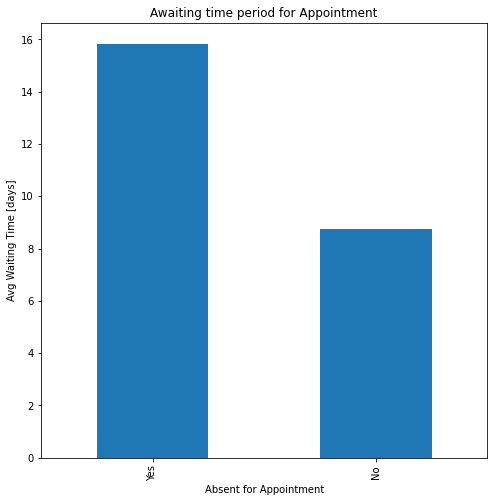

In [55]:
# Create a bar chart showing the average time taken by patients that either make their appointments or not.
df.groupby('Appointment_status')['time_before_appointment'].mean().sort_values(ascending=False).plot(kind='bar',
 xlabel='Absent for Appointment',ylabel='Avg Waiting Time [days]',title='Awaiting time period for Appointment',figsize=(8,8));

Here we can see that averagely, a longer time duration betweeen the scheduled day and the appointment day usually tend to result in a no show from patients.

the time interval between scheduled day and their appointment day isn't a big factor that affect patients showing up for their appointment.

**3. What factors are important for us to know if patients will show up for their appointments**


In [66]:
# Lets check the different variables and use them to answer our research question. 
# These variables to be considered are mainly numerical and categorical variables as portrayed below:

def plot_variable_counts(dataframe, variables):
    num_rows = len(variables) // 2 + len(variables) % 2
    num_cols = 2

    fig = plt.figure(figsize=(15, 25))

    for i, var in enumerate(variables):
        ax = fig.add_subplot(num_rows, num_cols, i+1)
        dataframe.groupby([var, 'Appointment_status'])[var].count().unstack('Appointment_status').plot(ax=ax, kind='bar', stacked=True)
        ax.set_title(var)
        ax.set_xlabel(var)
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()


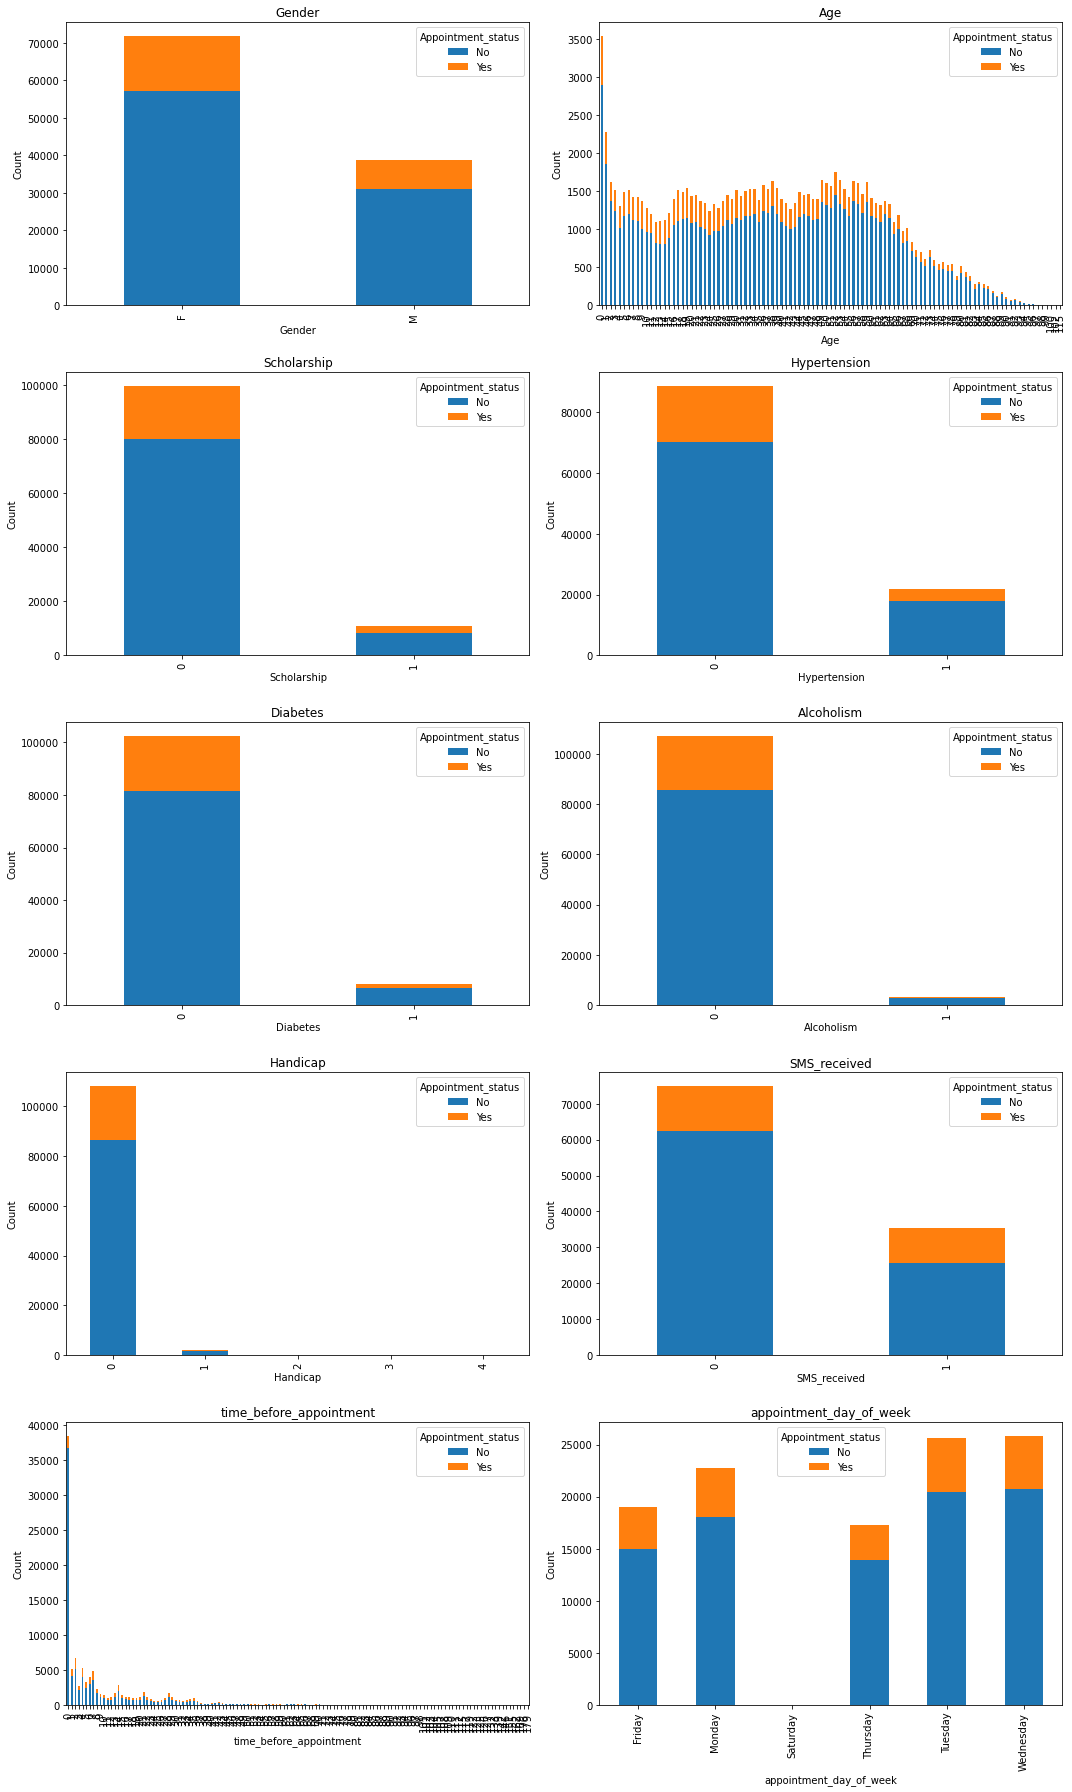

In [67]:
variables = ['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
             'SMS_received','time_before_appointment', 'appointment_day_of_week']


plot_variable_counts(df, variables)

The distribution rates of these additional features indicate a similar pattern in terms of patients attending their appointments. 


The percentage differences across the features are consistent and show a higher percentage of patients attending appointments within the various analyzed categories. However, to draw more meaningful conclusions, further analysis is necessary for each of these features.

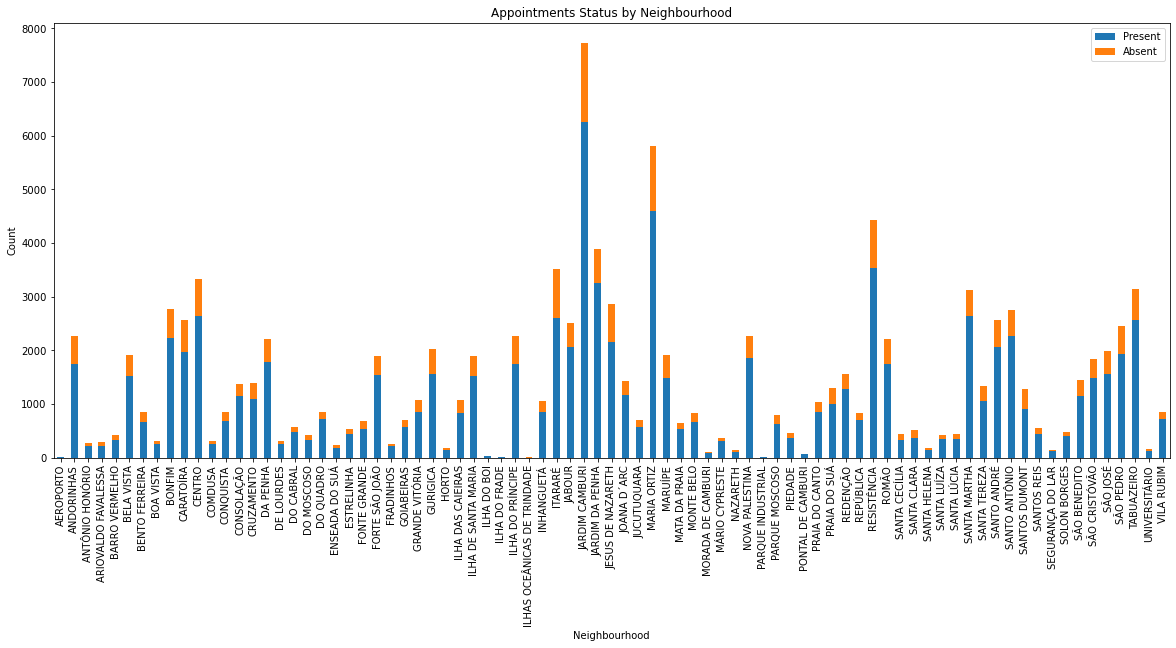

In [86]:
neighborhoods_by_status = df.groupby(['Neighbourhood', 'Appointment_status']).size().unstack()

# Plotting the stacked bar chart
neighborhoods_by_status.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Appointments Status by Neighbourhood')
plt.legend(['Present', 'Absent'])
plt.xticks(rotation=90)
plt.show()



**4. Is there a relationship between age and having a scholarship?**

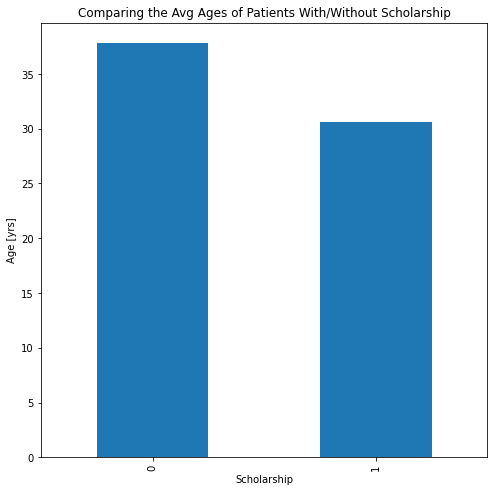

In [69]:
# This statistics isn't enough to see any trend or relationship. Let plot a bar chart to show relationship.

# Lets use the mean age to compare with the scholarship data
group = df.groupby('Scholarship').mean()['Age']

group.plot(kind='bar', title='Comparing the Avg Ages of Patients With/Without Scholarship', ylabel='Age [yrs]', figsize=(8,8));

In [72]:
p_corr = df['Age'].corr(df['Scholarship'])

p_corr

-0.09246320047708508

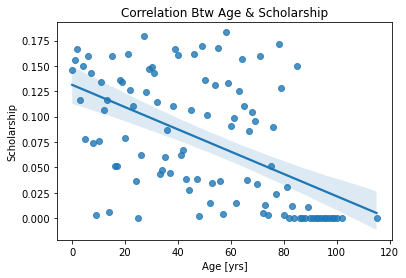

In [73]:
avg_scholarship = df['Scholarship'].groupby(df['Age']).mean()
age = df['Age'].unique()
sns.regplot(x = age , y = avg_scholarship)
plt.xlabel('Age [yrs]')
plt.title('Correlation Btw Age & Scholarship')
plt.show()

Based on the provided statistics, visualization, and correlation graph, there appears to be a negative correlation. 

However, it is important to note that the available data may be insufficient to establish a conclusive correlation. 

Nevertheless, the information suggests that age does not have a significant impact on the likelihood of receiving a scholarship.